In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [68]:
df1 = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Auto.csv', na_values='?').dropna()

In [69]:
t_prop = 0.5
p_order = np.arange(1,11) # polynomial degree
r_state = np.arange(0,10) # every seed splplits differently

In [70]:
X, Y = np.meshgrid(p_order, r_state, indexing='ij') # constant rows and constant cols
X, Y

(array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
        [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
        [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
        [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
        [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
        [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
        [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]]),
 array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]))

In [71]:
Z = np.zeros((p_order.size,r_state.size)) # allocate memory for MSE
# printing pairs
# Prints a 10 by 10 matrix of pairs in tall format
print("degrees  ", "seed")
counter = 0 # to limitate output
for (i,j),v in np.ndenumerate(Z):
  print(X[i, j], "       ", Y[i, j])
  counter +=1
  if counter >=10: break # comment it to get all output

degrees   seed
1         0
1         1
1         2
1         3
1         4
1         5
1         6
1         7
1         8
1         9


In [72]:
regr = skl_lm.LinearRegression()

In [73]:
simpleData = np.array([1, 2, 3]).reshape(-1, 1)
polFeatures = PolynomialFeatures(degree=2)
transformedData = polFeatures.fit_transform(simpleData)
transformedData

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

Above we see polynomial features of 123. Now let us see polynomial features of a real data column: horse power. 

In [74]:
df1.shape


(392, 9)

In [75]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [76]:
# Generate 10 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j])) # set transormation object with poly degree from X matrix
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1)) # transform data by object
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, df1.mpg.ravel(),
                                                        test_size=t_prop, random_state=Y[i,j])
    # randomly half split data by using seeds from Y matrix below
                                                                        
    regr.fit(X_train, y_train) 

    pred = regr.predict(X_test)

    # calculate MSE on validation data
    Z[i,j]= mean_squared_error(y_test, pred)

X_poly.ndim, np.shape(X_poly)

(2, (392, 11))

In [77]:
X_poly

array([[1.00000000e+00, 1.30000000e+02, 1.69000000e+04, ...,
        8.15730721e+16, 1.06044994e+19, 1.37858492e+21],
       [1.00000000e+00, 1.65000000e+02, 2.72250000e+04, ...,
        5.49378367e+17, 9.06474305e+19, 1.49568260e+22],
       [1.00000000e+00, 1.50000000e+02, 2.25000000e+04, ...,
        2.56289062e+17, 3.84433594e+19, 5.76650391e+21],
       ...,
       [1.00000000e+00, 8.40000000e+01, 7.05600000e+03, ...,
        2.47875891e+15, 2.08215749e+17, 1.74901229e+19],
       [1.00000000e+00, 7.90000000e+01, 6.24100000e+03, ...,
        1.51710881e+15, 1.19851596e+17, 9.46827608e+18],
       [1.00000000e+00, 8.20000000e+01, 6.72400000e+03, ...,
        2.04414086e+15, 1.67619550e+17, 1.37448031e+19]])

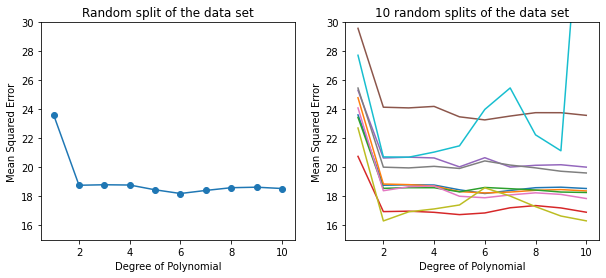

In [78]:


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o') # plot first column of degrees and MSE
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

Different lines = different seeds

Different points of lines = differrent degrees of polynom

# Another way by zip

In [79]:
t_prop = 0.5
p_order = np.arange(1,11) # polynomial degree
r_state = np.arange(0,10) # every seed splplits differently

In [80]:
X, Y = np.meshgrid(p_order, r_state, indexing='ij') # constant rows and constant cols
pairs = np.c_[X.ravel(), Y.ravel()]
pairs[:10]

array([[1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [1, 8],
       [1, 9]])

In [81]:
regr = skl_lm.LinearRegression()
pairs.shape

(100, 2)

In [82]:
z = zip(*pairs.T) # this way
next(z), next(z), next(z)

((1, 0), (1, 1), (1, 2))

In [83]:
z = zip(*pairs) # not this way
next(z)[:10], next(z)[:10]

((1, 1, 1, 1, 1, 1, 1, 1, 1, 1), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [84]:
Z = []
for degree, seed in zip(*pairs.T):
  poly = PolynomialFeatures(int(degree)) # set transormation object with poly degree from X matrix
  X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1)) # transform data by object
    
  X_train, X_test, y_train, y_test = train_test_split(X_poly, df1.mpg.ravel(),
                                                        test_size=t_prop, random_state=seed)
  # randomly half split data by using seeds from Y matrix below
                                                                        
  regr.fit(X_train, y_train) 

  pred = regr.predict(X_test)

  # calculate MSE on validation data
  Z.append(mean_squared_error(y_test, pred))

Z = np.array(Z).reshape(len(p_order), len(r_state))
Z.shape

(10, 10)

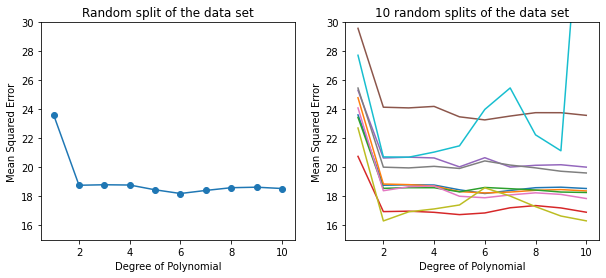

In [85]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o') # plot first column of degrees and MSE
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));